# Classification of Patients with Diabetes based on CDC Diabetes Health Indicators

Dataset: CDC Diabetes Health Indicators
<br>https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The features consist of demographic information (eg. sex, age), presence of comorbid conditions (eg. high blood pressure, high cholesterol), lifestyle factors (eg. smoker, alcohol consumption) and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes or not.

<b>Objective:</b>
The objective of this project is to build a model that best classify whether a patient has diabetes or not. This can be useful for health providers or administrators in planning intervention or policies.

<b>Target variable:</b>
Whether a patient has diabetes or not.
- Diabetes_binary: 0 = no diabetes, 1 = prediabetes or diabetes

<b>Features in the Dataset:</b><br>
![image.png](attachment:5ba68688-2b5c-4437-b9cd-97c1ad75ae39.png)

### Outline of Project
1. Data Preparation & EDA
2. Preparation for Predictive Modelling
3. Logistic Regression
4. Support Vector Machines
5. Random Forest
6. XGBoost
7. Voting Classifier
8. Feedforward Neural Network
9. Conclusion & Future Work

## 1. Data Preparation

### 1.1 Data Pre-processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [ ]:
df = data.copy()
print(df.shape)
df.head()

(253680, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


There are no null values observed in the dataset. However, they are all loaded as "float" type. I will convert all columns except for "BMI" to "int" type as these values are binary / ordinal & not expected to take decimal values.

In [ ]:
print(df.info())
print(" ")
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 253680 entries, 0 to 253679

Data columns (total 22 columns):

 #   Column                Non-Null Count   Dtype  

---  ------                --------------   -----  

 0   Diabetes_binary       253680 non-null  float64

 1   HighBP                253680 non-null  float64

 2   HighChol              253680 non-null  float64

 3   CholCheck             253680 non-null  float64

 4   BMI                   253680 non-null  float64

 5   Smoker                253680 non-null  float64

 6   Stroke                253680 non-null  float64

 7   HeartDiseaseorAttack  253680 non-null  float64

 8   PhysActivity          253680 non-null  float64

 9   Fruits                253680 non-null  float64

 10  Veggies               253680 non-null  float64

 11  HvyAlcoholConsump     253680 non-null  float64

 12  AnyHealthcare         253680 non-null  float64

 13  NoDocbcCost           253680 non-null  float64

 14  GenHlth               253680 non-

In [ ]:
# Set all columns except for "BMI" to int type
columns_to_convert = df.columns.difference(['BMI'])
df[columns_to_convert] = df[columns_to_convert].astype(int)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 253680 entries, 0 to 253679

Data columns (total 22 columns):

 #   Column                Non-Null Count   Dtype  

---  ------                --------------   -----  

 0   Diabetes_binary       253680 non-null  int32  

 1   HighBP                253680 non-null  int32  

 2   HighChol              253680 non-null  int32  

 3   CholCheck             253680 non-null  int32  

 4   BMI                   253680 non-null  float64

 5   Smoker                253680 non-null  int32  

 6   Stroke                253680 non-null  int32  

 7   HeartDiseaseorAttack  253680 non-null  int32  

 8   PhysActivity          253680 non-null  int32  

 9   Fruits                253680 non-null  int32  

 10  Veggies               253680 non-null  int32  

 11  HvyAlcoholConsump     253680 non-null  int32  

 12  AnyHealthcare         253680 non-null  int32  

 13  NoDocbcCost           253680 non-null  int32  

 14  GenHlth               253680 non-

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25.0,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28.0,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27.0,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24.0,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


There are 24206 rows that are duplicates, which takes up about 10% of the sample. It is unclear if these are due to different individuals having the exact same parameter values, or due to errors in the data collection process.

Looking at the target values of these duplicate rows, only about 1.03% are diabetics (Diabetes_binary = 1).

Considering that this dataset is highly imbalanced, with 86.07% being Diabetes_binary = 0, thus dropping the duplicate rows will be helpful to prevent the duplicates from distorting or overfitting the models towards the majority class.

In [ ]:
# Proportion of target classes
print("Proportion of Target Classes (Overall dataset):")
print(df['Diabetes_binary'].value_counts(normalize=True),"\n")

#Checking for duplicated rows
print("Duplicate rows:", df.duplicated().sum())

duplicates_df = df[df.duplicated()]
duplicates_df['Diabetes_binary'].value_counts()

Proportion of Target Classes (Overall dataset):

0    0.860667

1    0.139333

Name: Diabetes_binary, dtype: float64 



Duplicate rows: 24206


0    23957
1      249
Name: Diabetes_binary, dtype: int64

In [ ]:
#Drop duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(229474, 22)

In [ ]:
# List of binary, ordinal & numerical features
target = ['Diabetes_binary']
features_binary = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
features_ordinal = ['GenHlth', 'Age', 'Education', 'Income']
features_numerical = ['BMI', 'MentHlth', 'PhysHlth']

### 1.2 Exploratory Data Analysis

#### 1.2.1 Distribution of classes in the Target variable (Diabetes_binary)
0 = no diabetes, 1 = prediabetes or diabetes

The plot shows that the dataset is highly imbalanced, with 84.7% in Class 0 (no diabetes) and the remaining 15.3% in Class 1 (pre-diabetes or diabetes). As such, there is a risk that this model may overfit towards the majority class (Class 0, no diabetes). If required, strategies to manage imbalanced classes may be needed (will be discussed at a later segment).

Proportion of Target Classes:

Diabetes_binary

0    0.847055

1    0.152945

Name: proportion, dtype: float64 




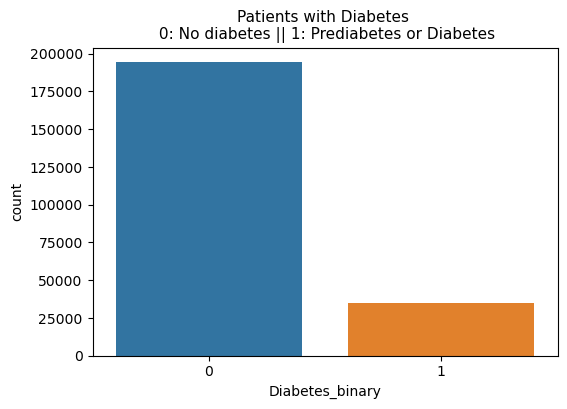

In [ ]:
print("Proportion of Target Classes:")
print(df['Diabetes_binary'].value_counts(normalize=True),"\n")

# Plot distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Diabetes_binary'])
plt.title('Patients with Diabetes \n 0: No diabetes || 1: Prediabetes or Diabetes', fontsize=11)

plt.show()

#### 1.2.2 Distribution of values in the Binary features

Binary features: 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'

Comparing the distributions between healthy and diabetic patients, it is observed that the following features have a sizably larger proportion of diabetic patients (with value=1): 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'AnyHealthcare', 'DiffWalk'. This suggests that these features could be important in determining whether a patient has diabetes.

In contrast, the following features appear to have a sizably larger proportion of non-diabetic patients (with value=1): 'PhysActivity', 'Fruits', 'Veggies'. This suggests that these features could be important in determining if a person does not have diabetes.

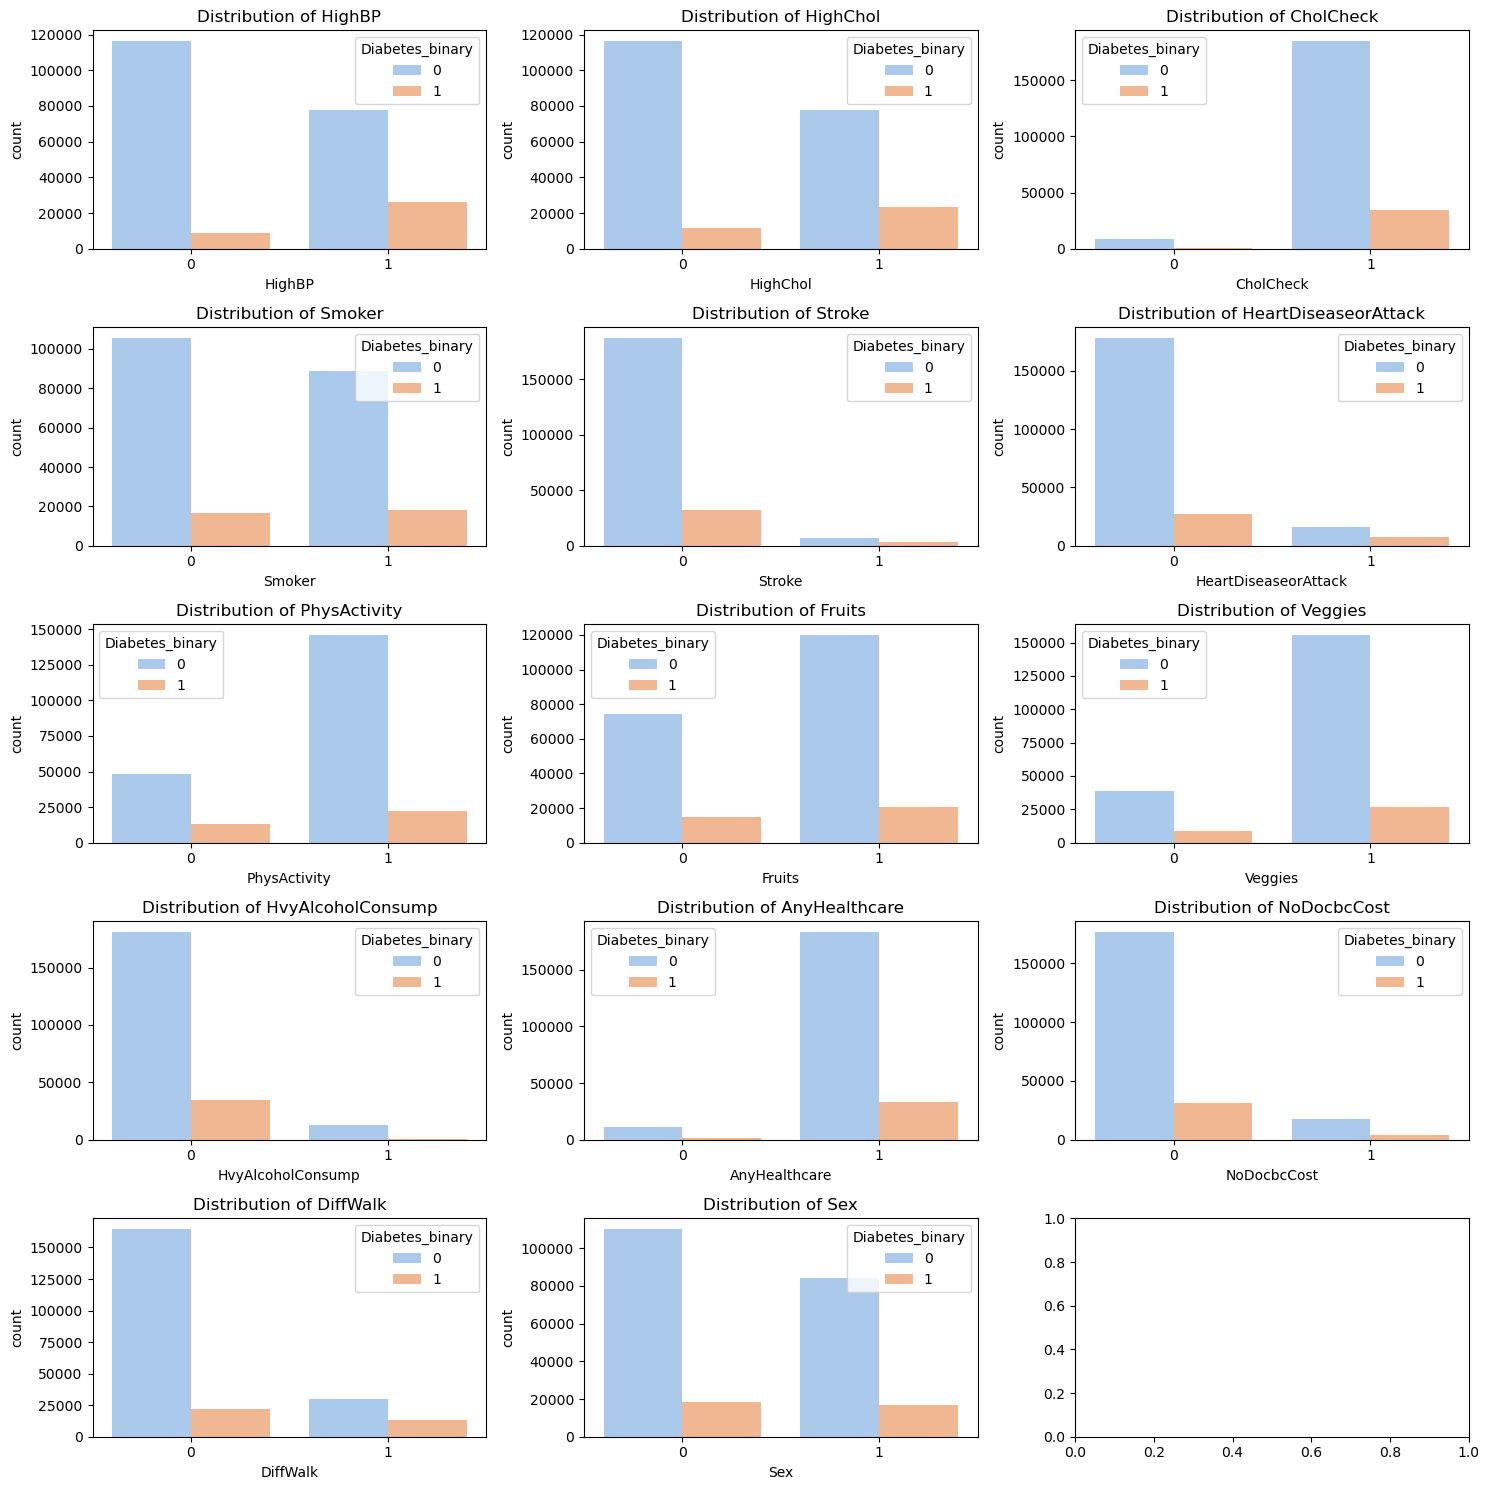

In [ ]:
# Set up subplots for plotting
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Loop through binary features and create plots
for i, feature in enumerate(features_binary):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue='Diabetes_binary', data=df, ax=axes[row, col], palette='pastel')
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

#### 1.2.3 Distribution of values in Ordinal features
Ordinal features: 'GenHlth', 'Age', 'Education', 'Income'

Based on the plots below, it is observed that patients with diabetes tend to have be older (higher 'Age'), of poorer health (higher 'GenHlth'), as well as being less educated & of lower income (larger proportions of diabetic patients in lower brackets of 'Education' and 'Income'). Thus, these features could be potentially useful in classifying diabetic patients.

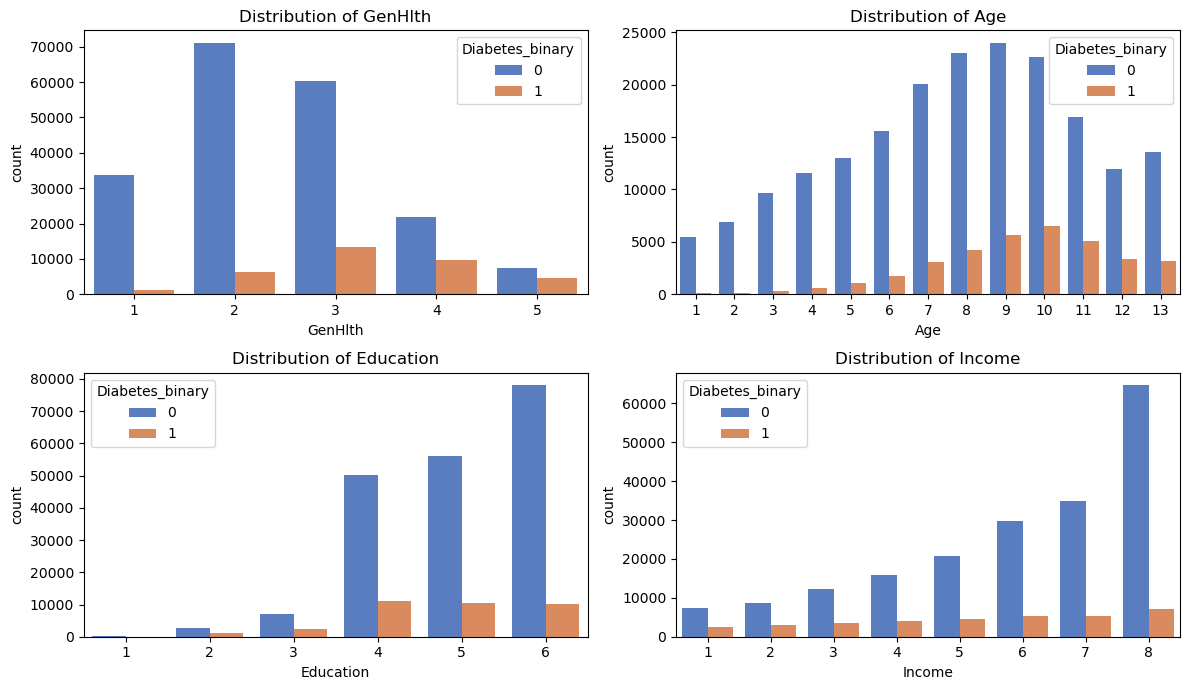

In [ ]:
# Set up subplots for plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,7))
fig.subplots_adjust(hspace=0.5)

# Loop through binary features and create plots
for i, feature in enumerate(features_ordinal):
    row, col = i // 2, i % 2
    sns.countplot(x=feature, hue='Diabetes_binary', data=df, ax=axes[row, col], palette='muted')
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

#### 1.2.4 Distribution of values in Numerical features
Numerical features: 'BMI', 'MentHlth', 'PhysHlth'

The distributions of all the features appear to skew towards the right. Observing the box plots, there are also many points that lie outside the whiskers. This suggests that while most individuals are concentrated towards 20-40 BMI or 0-5 MentHlth and PhysHlth, there is still a wide range of values that can apply to individuals.

In the case of MentHlth and PhysHlth, values from 0-30 are valid as it was asked in the questionnaire during the data gathering process. However, it is plausible that most people will select a value of 0 if they do not have any issues with physical or mental health, thus explaining the observed distribution. Therefore, the observed outliers will not be removed.

In addition to the initial BMI distribution (BMI 0-100), a seperate histogram to better observe the distribution of BMI > 50 was plotted. It is observed that a sizable proportion of diabetic patients have high BMI > 30. Notably, about 40% of patients with BMI 50-70 are diabetic (whereas diabetics only take up 13.93% of the whole dataset). This suggests that there is likely to be a positive correlation between diabetes and BMI.

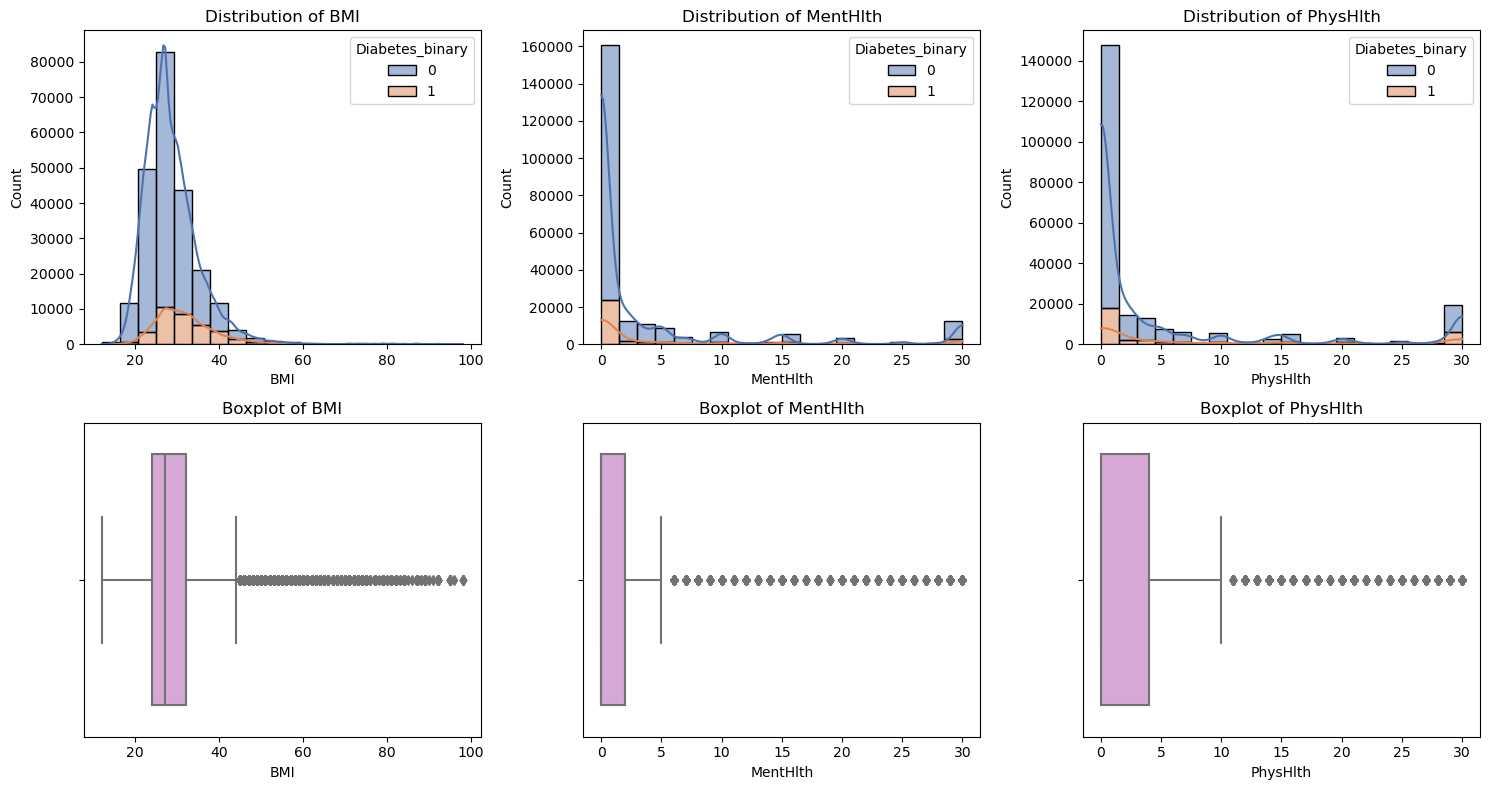

In [ ]:
# Plot histplot and boxplot for each numerical feature
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features_numerical, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df, x=feature, kde=True, bins=20, hue='Diabetes_binary', multiple='stack', palette='deep')
    plt.title(f'Distribution of {feature}')

    plt.subplot(2, 3, i + 3)
    sns.boxplot(x=df[feature], color='plum')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

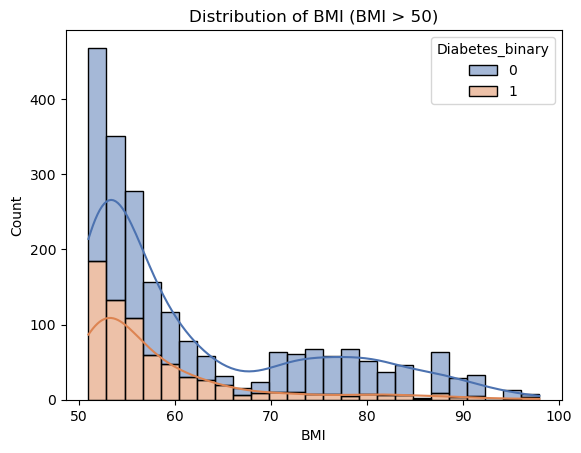

In [ ]:
# Zooming in, plot the histogram for BMI > 50
sns.histplot(df[df['BMI'] > 50], x='BMI', kde=True, bins=25, hue='Diabetes_binary', multiple='stack', palette='deep')
plt.title('Distribution of BMI (BMI > 50)')
plt.show()

#### 1.2.5 Visualise Correlation Matrix

Key observations from the correlation matrix:
- There are no features that are strongly correlated with each other (r > 0.7).
- 'GenHlth' is moderately correlated with PhysHlth (0.52) and DiffWalk (0.45). In addition, it so displays some moderate-weak correlation (r 0.2-0.4) with other features such as HighBP, PhysActivity, HeartDiseaseorAttack and MentHlth. This is likely due to general health being a broad-based measure which can also encompass these aspects of physical and mental health. However, considering that there is some correlation between GenHlth and the target variable (Diabetes_binary, r = 0.28), and that it is one of the strongest correlation among all the feature variables, this feature will be kept in the model.
- 'PhysHlth' and 'DiffWalk' also displayed a moderate correlation with r = 0.47. This is plausible as an individual who is not in good physical health may have difficulties with walking or climbing stairs. However, these features consider different aspects of physical health - the former is more generic, while the latter also gives an indication of the patient's severity of disease (r=0.21 with Diabetes_binary). Therefore, both variables will be included in the model.
- 'Education' and 'Income' also showed moderate correlation with r = 0.42. This is expected as a person with more education is more likely to earn a higher income. As these factors encompass different aspects of a patient's socio-demographic information, both features will therefore be kept in the model.
- 'MentHlth' and 'PhysHealth' displayed a weak-moderate correlation with r = 0.34. This is plausible as an individual with poorer mental health may also struggle with their physical health, vice versa. However, as these encompass different aspects of an individual's health, both features will be included in the model.

Overall, as there are no two features that are highly correlated, and the interactions between other moderately correlated features can be explained, no major redundancies in the existing features are expected. Therefore, all features will be included in the model.

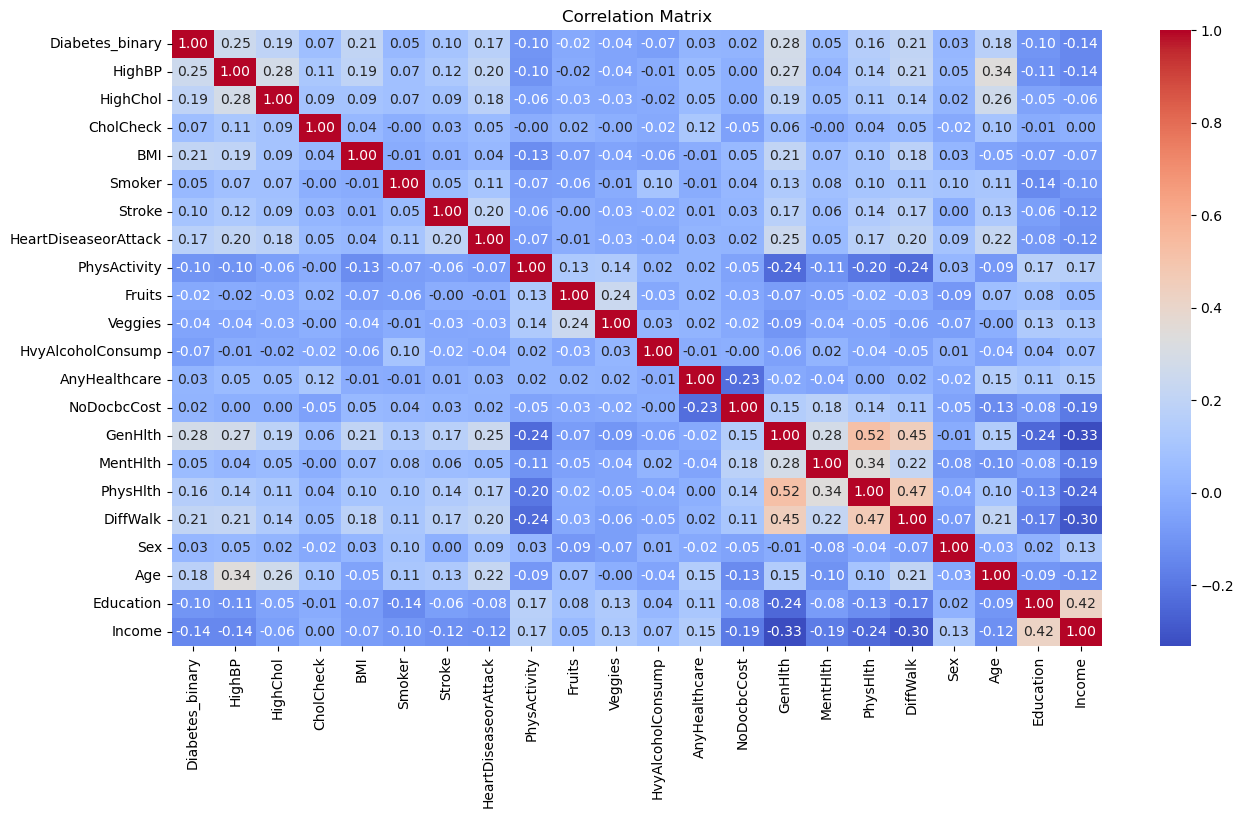

In [ ]:
# Plot the correlation matrix heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 2. Preparation for Predictive Modelling

### 2.1 Data Preparation & Train Test Split

Given the large sample size, the dataset will be split using an 80:20 ratio for training and testing, respectively. As the dataset is highly imbalanced, the split will be stratified to preserve the proportion of each target class in the training & test set.

In [ ]:
# Separate target variable & features
X = df.drop(columns = 'Diabetes_binary')
y = df['Diabetes_binary']

print(X.shape, y.shape)

(229474, 21) (229474,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88, stratify = y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(183579, 21) (45895, 21) (183579,) (45895,)


Considering that all the ordinal features 'GenHlth', 'Age', 'Education', 'Income' are already ordered and in numerical format, there is no need to perform further ordinal encoding.

Categorical variables such as 'HighBP', 'HighChol', 'CholCheck', 'Smoker', etc. are all binaries with values of 0 (No) or 1 (Yes), thus there is no need to perform any one-hot encoding.

### 2.2 Defining the Classification Metrics

Considering the imbalanced nature of the target class, metrics that will be used to assess the models include:
- F1 Score: harmonic mean of precision and recall
- AUC-ROC score: area under TPR vs FPR curve (not dependent on class proportions)
- Balanced accuracy: average of recall/sensitivity (TPR) and specificity (TNR)
- Confusion matrix

When computing the metrics, weighted averaging is applied to take into account the imbalanced dataset, where the number of instances in each class is not equal and a simple average might not accurately represent the model's performance.

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
# Define a python function to compute training & testing set metrics
# The weighted average is taken in order to account for class imbalance
def measure_error(y_true, y_pred, label):
    return pd.Series({
        'balanced_accuracy': balanced_accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1': f1_score(y_true, y_pred, average='weighted'),
        'auc_roc': roc_auc_score(y_true, y_pred, average='weighted')
    }, name=label)


# Function to evaluate the model - fits the model, then computes training vs testing set metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Computes the metrics for the training & testing set, and presents them in a dataframe
    train_test_error = pd.concat([measure_error(y_train, y_train_pred, 'Train'),
                                    measure_error(y_test, y_test_pred, 'Test')],
                                    axis=1)
    print(train_test_error, "\n")

    # Display classification report for test set
    print("Testing Set Classification Report:\n", classification_report(y_test, y_test_pred))

    # Display confusion matrix for the Test set
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(cm)

    return disp.plot()

## 3. Logistic Regression Model

In order to provide some baseline results on the performance when trained on the imbalanced dataset, Logistic Regression models being simpler and suitable for classification tasks will be trained.

### 3.1 Baseline Logistic Regression

Based on the results of the baseline model, it appears that the model is heavily overfitting towards the majority class, with F1-score of 0.92 & recall of 0.98 for Class 0 (non-diabetics), but poor F1-score of 0.22 and recall of 0.14 for the minority class (Class 1, diabetics).

                      Train      Test

balanced_accuracy  0.564061  0.560128

precision          0.815039  0.813954

recall             0.850615  0.850332

f1                 0.813087  0.811308

auc_roc            0.564061  0.560128 



Testing Set Classification Report:

               precision    recall  f1-score   support



           0       0.86      0.98      0.92     38876

           1       0.54      0.14      0.22      7019



    accuracy                           0.85     45895

   macro avg       0.70      0.56      0.57     45895

weighted avg       0.81      0.85      0.81     45895

 




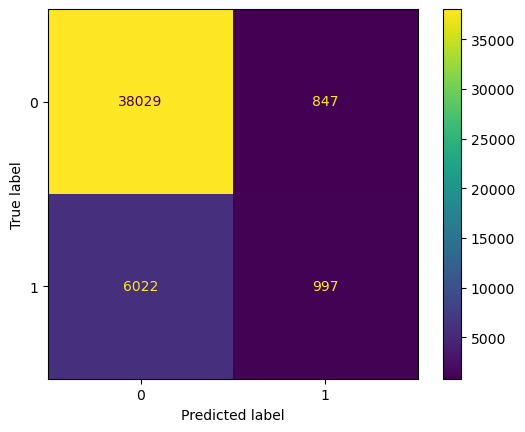

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialise standard scaler
scaler = StandardScaler()

# Create a logistic regression model without regularisation
logr = LogisticRegression()

# Create a pipeline with a standard scaler and the logistic regression model
pipe = Pipeline([
    #(nickname, step)
    ('scaler', scaler),
    ('logr', logr)
])

# Evaluate the model
evaluate_model(pipe, X_train, y_train, X_test, y_test)

### 3.2 Logistic Regression with Balanced Class Weights

As the baseline model is heavily overfitting towards the majority class, an adjustment to the class weights will be applied:
```class_weight = 'balanced'```

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as ```n_samples / (n_classes * np.bincount(y))```. In doing so, more weight/importance is given to the minority class during training.

Key Results:
- Improvement in AUC-ROC: 0.56 to 0.73
- Balanced accuracy increased from 0.56 to 0.73
- Overall F1-score decreased from 0.81 to 0.76
- F1-score for minority class (1) increased from 0.25 to 0.45
- Recall of minority class (1) increased from 0.14 to 0.75
- F1-score for majority class (0) decreased from 0.92 to 0.81
- Recall for majority class (0) decreased from 0.98 to 0.72

Based on these results after balancing the class weights, the overfitting towards the majority class (0) has decreased significantly. While there is overall decrease in F1-score, due to more of the majority class being misclassified (decrease in F1 and Recall), the overall AUC-ROC and balanced accuracy has both improved by 0.17 (to 0.73). Importantly, the recall for the minority class (1) improved from only 0.14 to 0.75, which is key as predicting of patients at risk of diabetes is of primary interest.

                      Train      Test

balanced_accuracy  0.733140  0.730667

precision          0.846510  0.845115

recall             0.717963  0.720536

f1                 0.755253  0.757169

auc_roc            0.733140  0.730667 



Testing Set Classification Report:

               precision    recall  f1-score   support



           0       0.94      0.72      0.81     38876

           1       0.32      0.75      0.45      7019



    accuracy                           0.72     45895

   macro avg       0.63      0.73      0.63     45895

weighted avg       0.85      0.72      0.76     45895

 




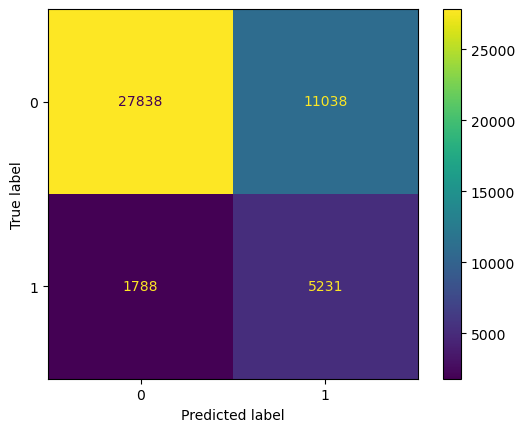

In [ ]:
# Initialise standard scaler
scaler = StandardScaler()

# Create a logistic regression model without regularisation but with balanced class weights
logr = LogisticRegression(class_weight = 'balanced')

# Create a pipeline with a standard scaler and the logistic regression model
pipe = Pipeline([
    #(nickname, step)
    ('scaler', scaler),
    ('logr', logr)
])

# Evaluate the model
evaluate_model(pipe, X_train, y_train, X_test, y_test)

### 3.3 Optimising Logistic Regression with GridSearchCV

In an attempt to improve on the Logistic Regression model, GridSearchCV will be applied to:
- Determine if polynomial features (degree=2) will improve the model. <br>This may potentially be beneficial as it was shown during EDA that there could be certain features that are related, such as 'GenHlth' and 'PhysHlth' or 'DiffWalk'.
- Find the best solver for Logistic Regression. <br>Based on the documentation on ScikitLearn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), the default solver is ‘lbfgs’, while ‘sag’ and ‘saga’ are faster for large datasets. Other solvers appear to be more applicable for small-medium datasets or multi-class problems. Therefore, only these 3 solvers will be assessed as they are more applicable in this context.

Lasso regularisation was considered for feature selection. However, the primary concern in this project is to address the imbalanced data issues which was done by adjusting class weights (balanced) as well as using evaluation metrics that account for imbalances (eg. balanced accuracy, precision, recall, F1, auc-roc). Furthermore, the model does not appear to be overfitting as the results (metrics) of the train vs test set appears to be quite similar. If there was overfitting, the results for the training set will likely be significantly better than that of the testing set. Therefore, regularisation is not expected to provide significant benefit and thus not applied.

In [ ]:
# Initialise model
scaler = StandardScaler()
poly = PolynomialFeatures(interaction_only=True)  # will let GridSearch find the best degree

logr = LogisticRegression(
    # solver = ?,          # will let GridSearch find the best solver
    class_weight = 'balanced'
)

### Pipeline ###
pipe = Pipeline([
   #(nickname, step)
    ('poly', poly),  # degree selected by GridSearchCV
    ('scaler', scaler),
    ('logr', logr) # C selected by GridSearchCV
])

### Parameters to search over ###
param_grid = {
    #'step__param' : [list of param values]
    'poly__degree' : [1,2],
    'logr__solver' :['lbfgs', 'sag', 'saga']
}

### Validator ###
# Use 3 k-fold, considering the size of the dataset & computational power
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

## GridSearch ###
grid = GridSearchCV(pipe,       # model to use
                    param_grid, # parameters to search over
                    scoring = ['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'], # metrics to compute
                    refit = 'balanced_accuracy',  # which metric to use to decide the best model
                    cv = cv,
                    n_jobs = -1
                   )

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=88, shuffle=True),
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(interaction_only=True)),
                                       ('scaler', StandardScaler()),
                                       ('logr',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logr__solver': ['lbfgs', 'sag', 'saga'],
                         'poly__degree': [1, 2]},
             refit='balanced_accuracy',
             scoring=['precision', 'recall', 'f1', 'balanced_accuracy',
                      'roc_auc'])

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'logr__solver': 'lbfgs', 'poly__degree': 2}

0.7381349152260651


Based on GridSearchCV, the best model used the default 'lbfgs' solver, and polynomial features with degree = 2.
<br> Considering that there may be certain features that are related, such as 'GenHlth' and 'PhysHlth' or 'DiffWalk', this may possibly explain why logistic regression with degree 2 polynomial features performed better.

These parameters will be applied to build the optimised logistic regression model below.

With this new model, key classification results when applied to the test set:
- Balanced accuracy increased from 73.07% to 73.62%
- AUC-ROC score increased slightly from 0.7306 to 0.7362
- Recall for the minority class (1) increased from 75% to 77%
- Overall F1 score decreased slightly from 75.71% to 75.20% (appears to be contributed by shifting of predictions towards minority class)

                      Train      Test

balanced_accuracy  0.739727  0.736157

precision          0.850361  0.848368

recall             0.711498  0.713716

f1                 0.750376  0.752018

auc_roc            0.739727  0.736157 



Testing Set Classification Report:

               precision    recall  f1-score   support



           0       0.94      0.70      0.81     38876

           1       0.32      0.77      0.45      7019



    accuracy                           0.71     45895

   macro avg       0.63      0.74      0.63     45895

weighted avg       0.85      0.71      0.75     45895




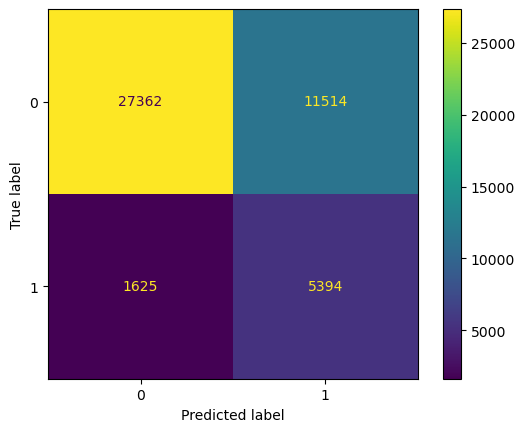

In [ ]:
# Initialise standard scaler
scaler = StandardScaler()
# Apply degree=2 to polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Create a logistic regression model without regularisation but with balanced class weights, apply solver='lbfgs'
logr = LogisticRegression(solver='lbfgs', class_weight = 'balanced')

# Create a pipeline with a standard scaler and the logistic regression model
pipe = Pipeline([
   #(nickname, step)
    ('poly', poly),
    ('scaler', scaler),
    ('logr', logr)
])

# Evaluate the model
evaluate_model(pipe, X_train, y_train, X_test, y_test)

## 4. Support Vector Machines

Considering that the dataset is rather complex and large, and consisting of 20 features, it is likely that the decision boundaries for classification is rather complex and high-dimensional. Therefore, another model that was considered is the Support Vector Machine.

As the dataset is large, use of the 'kernel trick' with SVC is likely to not be feasible. Instead, non-linear transformations (Polynomial & Radial Basis Function features) will be applied, and subsequently fed into LinearSVC.

### 4.1 Linear SVC with Polynomial Features

First, I will attempt to apply non-linear transformations with polynomial features before feeding it into the LinearSVC.

Considering the long training time needed for Polynomial features + SVMs, HalvingGridSearchCV will be applied instead of the usual GridSearchCV. HalvingGridSearchCV involves an iterative selection process where all parameter combinations are evaluated with a small amount of resources at the first iteration, with the best half moving on to and being allocated more resources in subsequent iterations. <br>
However, a potential disadvantage is that in eliminating a proportion of the least promising candidates, HalvingGridSearchCV may not fully explore the parameter space, potentially missing out on optimal combinations. <br>
Considering the short timeframe, I will still proceed with HalvingGridSearchCV for SVM in order to reduce computational costs and training time.

Polynomial features with degrees 1 (equivalent to LinearSVC) or 2 are evaluated. It is possible that there may be higher-order iteractions considering the number of features in the dataset and from observations during earlier exploratory data analysis. However, with the large number of features performing polynomial features with degrees more than 2 takes a very long time and therefore is excluded for this project.

Another parameter that will be tuned is C. Values equal to or less than 1 will be searched, as prior trial runs (done separately, not shown here) indicated that a lower C tends to have better results. This could be because in imbalanced datasets, the SVM might be biased toward the majority class. A small C value imposes a stronger regularization, placing more emphasis on achieving a simpler decision boundary that generalizes well. This can help prevent the model from fitting the majority class too closely and gives it more flexibility to correctly classify instances from the minority class.

In [ ]:
from sklearn.svm import LinearSVC

# Initialise model
scaler = StandardScaler()
poly = PolynomialFeatures(interaction_only=True)

svc = LinearSVC(class_weight='balanced', dual=True)

### Pipeline ###
pipe = Pipeline([
   #(nickname, step)
    ('poly', poly),  # degree selected by GridSearchCV
    ('scaler', scaler),
    ('svc', svc) # C selected by GridSearchCV
])

### Parameters to search over ###
param_grid = {
    #'step__param' : [list of param values]
    'poly__degree' : [1, 2],
    'svc__C' :[0.001, 0.01, 0.1, 1]
}

### Validator ###
# Use 3 k-fold, considering the size of the dataset & computational power
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

## GridSearch ###
grid = HalvingGridSearchCV(pipe,
                           param_grid,
                           max_resources=50000,
                           cv=cv,
                           random_state=88,
                           n_jobs=-1
                          )

grid.fit(X_train, y_train)

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=88, shuffle=True),
                    estimator=Pipeline(steps=[('poly',
                                               PolynomialFeatures(interaction_only=True)),
                                              ('scaler', StandardScaler()),
                                              ('svc',
                                               LinearSVC(class_weight='balanced',
                                                         dual=True))]),
                    max_resources=50000, n_jobs=-1,
                    param_grid={'poly__degree': [1, 2],
                                'svc__C': [0.001, 0.01, 0.1, 1]},
                    random_state=88)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'poly__degree': 2, 'svc__C': 1}

0.7581503260130406


Based on GridSearchCV, the best model had C=1, and polynomial features with degree = 2.

These parameters will be applied to build the optimised SVM model below.

With this new model, key classification results when applied to the test set:
- Balanced accuracy: 73.50%
- AUC-ROC score: 0.7350
- Recall for the minority class (1): 77%
- Overall F1 score: 75.22%

These figures are very close to the results of logistic regression with polynomial features. This is likely because and reminded me of the lecture where it was shown that LinearSVC and Logistic regression are actually quite similar, where LinearSVC minimises SVM loss while logistic regression minimises log loss.
<br> With this in mind, I will not use LinearSVC + Polynomial features in subsequent ensemble (voting) models since it is very similar to logistic regression.

                      Train      Test

balanced_accuracy  0.739783  0.735040

precision          0.850321  0.847785

recall             0.712211  0.713999

f1                 0.750948  0.752200

auc_roc            0.739783  0.735040 



Testing Set Classification Report:

               precision    recall  f1-score   support



           0       0.94      0.70      0.81     38876

           1       0.32      0.77      0.45      7019



    accuracy                           0.71     45895

   macro avg       0.63      0.74      0.63     45895

weighted avg       0.85      0.71      0.75     45895




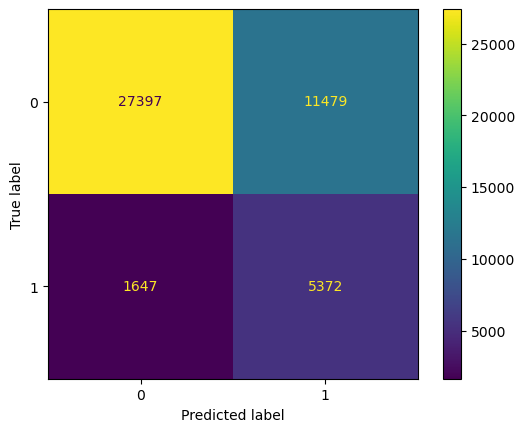

In [ ]:
# Evaluating the best model
from sklearn.svm import LinearSVC

# Initialise model
scaler = StandardScaler()
poly = PolynomialFeatures(interaction_only=True, degree=2)  # will let GridSearch find the best degree

svc = LinearSVC(class_weight='balanced', C=1, dual=True)

### Pipeline ###
pipe = Pipeline([
   #(nickname, step)
    ('poly', poly),  # degree selected by GridSearchCV
    ('scaler', scaler),
    ('svc', svc) # C selected by GridSearchCV
])

# Evaluate the model
evaluate_model(pipe, X_train, y_train, X_test, y_test)

### 4.2 Linear SVC with RBF Features

Second, I will attempt to apply non-linear transformations with radial basis function features and combining it with LinearSVC.

Similarly, HalvingGridSearchCV will be applied to shorten the training time. The rbf's gamma and SVC's C hyperparameters will be assessed to find the best combination.

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import RBFSampler

# Initialise model
scaler = StandardScaler()
rbf = RBFSampler()  # will let GridSearch find the best gamma

svc = LinearSVC(class_weight='balanced', dual=True)

### Pipeline ###
pipe = Pipeline([
   #(nickname, step)
    ('rbf', rbf),  # gamma selected by GridSearchCV
    ('scaler', scaler),
    ('svc', svc) # C selected by GridSearchCV
])

### Parameters to search over ###
param_grid = {
    #'step__param' : [list of param values]
    'rbf__gamma' : [0.01, 0.1, 1, 10, 100],
    'svc__C' :[0.01, 0.1, 1]
}

### Validator ###
# Use 3 k-fold, considering the size of the dataset & computational power
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

## GridSearch ###
grid = HalvingGridSearchCV(pipe,
                           param_grid,
                           max_resources=50000,
                           cv=cv,
                           random_state=88,
                           n_jobs=-1
                          )

grid.fit(X_train, y_train)

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=88, shuffle=True),
                    estimator=Pipeline(steps=[('rbf', RBFSampler()),
                                              ('scaler', StandardScaler()),
                                              ('svc',
                                               LinearSVC(class_weight='balanced',
                                                         dual=True))]),
                    max_resources=50000, n_jobs=-1,
                    param_grid={'rbf__gamma': [0.01, 0.1, 1, 10, 100],
                                'svc__C': [0.01, 0.1, 1]},
                    random_state=88)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'rbf__gamma': 0.01, 'svc__C': 1}

0.7232123212321233


Based on GridSearchCV, the best model had C=1, and RBF features with gamma = 0.01.

These parameters will be applied to build the optimised SVM + RBF model below.

With this new model, key classification results when applied to the test set:
- Balanced accuracy: 70.74%
- AUC-ROC score: 0.7074
- Recall for the minority class (1): 71%
- Overall F1 score: 74.48%

Overall, the SVM + RBF model did not perform as well as the Logistic regression + Polynomial features and SVM + Polynomial features models.

The RBF kernel maps the data into a high-dimensional space by finding the dot products and squares of all the features in the dataset, it is likely that this method of feature transformation perhaps was not able to separate out the different classes well.

                      Train      Test

balanced_accuracy  0.712145  0.707359

precision          0.837124  0.834740

recall             0.705337  0.706068

f1                 0.744440  0.744809

auc_roc            0.712145  0.707359 



Testing Set Classification Report:

               precision    recall  f1-score   support



           0       0.93      0.71      0.80     38876

           1       0.30      0.71      0.42      7019



    accuracy                           0.71     45895

   macro avg       0.62      0.71      0.61     45895

weighted avg       0.83      0.71      0.74     45895




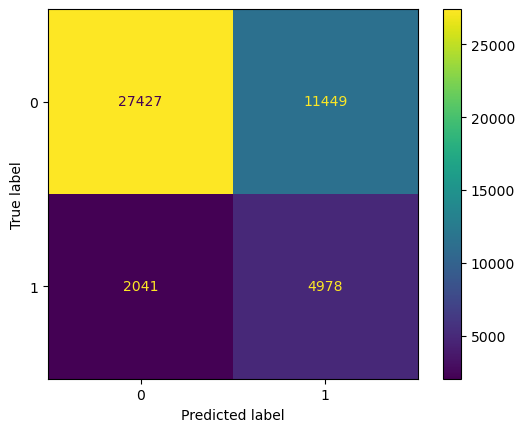

In [ ]:
# Evaluating the best model

# Initialise model
scaler = StandardScaler()
rbf = RBFSampler(gamma = 0.01)

svc = LinearSVC(class_weight='balanced', C=1, dual=True)

### Pipeline ###
pipe = Pipeline([
   #(nickname, step)
    ('rbf', rbf),  # degree selected by GridSearchCV
    ('scaler', scaler),
    ('svc', svc) # C selected by GridSearchCV
])

# Evaluate the model
evaluate_model(pipe, X_train, y_train, X_test, y_test)

## 5. Random Forest

In an attempt to improve on the earlier models, a different type of model will be trained. In this case, a tree-based model will be tried to see if it improves on the earlier results. I did not attempt to use a (normal) decision tree classifier as I expect that decision trees are very prone to overfitting this imbalanced dataset, which will likely lead to a very high variance (large difference between results of training & testing sets).

However, deep or large trees can be good at reducing bias, and in the case of this dataset possibly identify naunced features that seperate the majority & minority classes.

Therefore, in order to strike a balance while attempting to keep both bias and variance low, I will attempt to use a tree-based Bagging classifier, the Random Forst Classifier. Random Forest builds multiple decision trees, and each tree is trained on a random subset of features and samples. This randomness contributes to the diversity of the trees, making the ensemble more capable of capturing complex patterns in the data, including those present in the minority class.

As tree-based algorithms are not sensitive to scale, I will not be applying any scaling to the dataset.

Considering the imbalanced nature of the dataset, `class_weight='balanced'` will be applied to account for that.

In order to reduce the risk of overfitting, the size and depth of the trees will be controlled. To account for this, the following hyperparameters will be assessed and the best combination found through GridSearchCV:
- `max_depth` : To control the maximum depth of the tree.
- `max_leaf_nodes` : To control the maximum number of leaf nodes, and prioritise nodes with better reduction in impuritiy scores.
- `min_samples_split` : The minimum number of samples required to split a node, prevent cases where there is only a small number of samples in a node (overfitting)

In [ ]:
# Create a Random Forest model with balanced class weights
rfc = RandomForestClassifier(
    n_estimators = 100,  # default
    max_features='sqrt',
    # max_depth= ?, # to optimise
    # max_leaf_nodes = ?,  # to optimise
    # min_samples_split = ? # to optimise
    class_weight='balanced', # ensure balanced weights to account for class imbalance (balanced, balanced_subsample - very similar results)
    random_state=88)

### Parameters to search over ###
param_grid = {
    #'step__param' : [list of param values]
    'max_depth': [15, 20, 25, 30],
    'max_leaf_nodes': [50, 75, 100, 150],
    'min_samples_split': [50, 100, 200, 400]
}

### Validator ###
# Use 3 k-fold, considering the size of the dataset & computational power
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

## GridSearch ###
grid = GridSearchCV(rfc,       # model to use
                    param_grid, # parameters to search over
                    scoring = ['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'], # metrics to compute
                    refit = 'balanced_accuracy',  # which metric to use to decide the best model
                    cv = cv,
                    n_jobs = -1
                   )

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=88, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=88),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25, 30],
                         'max_leaf_nodes': [50, 75, 100, 150],
                         'min_samples_split': [50, 100, 200, 400]},
             refit='balanced_accuracy',
             scoring=['precision', 'recall', 'f1', 'balanced_accuracy',
                      'roc_auc'])

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 15, 'max_leaf_nodes': 150, 'min_samples_split': 200}

0.7368512666453508


Based on GridSearchCV, the best model involves a max_depth = 15, max_leaf_nodes = 150, min_samples_split = 200.

These parameters will be applied to build the optimised logistic regression model below.

With this new model, key classification results when applied to the test set:
- Balanced accuracy: 73.45%  (LR: 73.62%)
- AUC-ROC score: 0.7345  (LR: 0.7362)
- Recall for the minority class (1): 77%  (LR: 77%)
- Overall F1 score: 74.90%  (LR: 75.20%)

With these results, Random Forest performed similarly to Logistic Regression with 2-degree Polynomial Features. The test score metrics for random forest such as balanced accuracy were similar, but slightly lower (about 0.2% difference). The variance (difference between training and test scores) was also slightly larger for random forest.

                      Train      Test

balanced_accuracy  0.741018  0.734457

precision          0.851247  0.847853

recall             0.709161  0.709947

f1                 0.748548  0.748958

auc_roc            0.741018  0.734457 



Testing Set Classification Report:

               precision    recall  f1-score   support



           0       0.94      0.70      0.80     38876

           1       0.32      0.77      0.45      7019



    accuracy                           0.71     45895

   macro avg       0.63      0.73      0.63     45895

weighted avg       0.85      0.71      0.75     45895




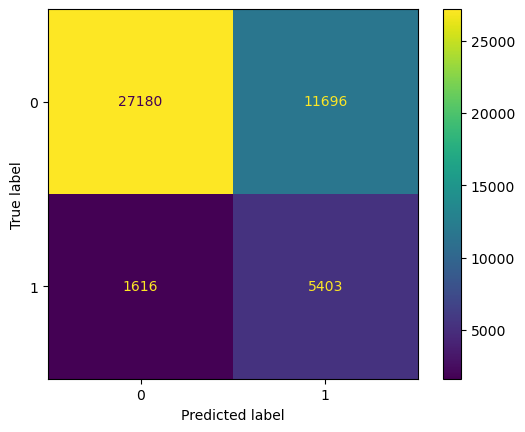

In [ ]:
# Create a Random Forest model with balanced class weights
rfc = RandomForestClassifier(
    n_estimators = 100,  # default
    max_features='sqrt',
    max_depth= 15,
    max_leaf_nodes = 150,
    min_samples_split = 200,
    class_weight='balanced', # ensure balanced weights to account for class imbalance (balanced, balanced_subsample - very similar results)
    random_state=88)

# Evaluate the model
evaluate_model(rfc, X_train, y_train, X_test, y_test)


## 6. XGBoost

XGBoost (eXtreme Gradient Boosting) is an ensemble (boosting) learning method that builds a series of weak learners (typically decision trees) sequentially, with each new learner adapating to (correcting) the errors made by the previous ones. As a result, the algorithm 'pays more attention' to misclassified instances, which also helps it to learn from the minority class and makes it robust to imbalanced datasets.

A boosting algorithm was considered in an attempt to reduce the bias of the model, and improve upon the earlier models. XGBoost was considered as it has better performance and speed than AdaBoost.

For XGBoost, I will use a tree as the base model, thus scaling is not needed. The individual trees are generally shallow (max_depth 1 to 7). GridSearchCV will be applied to find the best combination of hyperparameters (max_depth, learning_rate, subsample).

In [ ]:
from xgboost import XGBClassifier

# Calculate the ratio of the number of negative class samples to positive class samples
balanced_weights = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

param_grid = {
    'max_depth': [1, 3, 5, 7],  # default is 6   # train on small trees / decision stumps  # the higher the depth, the more likely to overfit
    'learning_rate' : [0.1, 0.2, 0.3, 0.4],  # default is 0.3   # learning_rate
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]    # default is 1    # Subsample ratio of the training instances, lower value prevents overfitting
}

# Create an XGBoost model with scale_pos_weight
xgb = XGBClassifier(booster='gbtree', scale_pos_weight=balanced_weights, random_state=88)

### Validator ###
# Use 3 k-fold, considering the size of the dataset & computational power
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

## GridSearch ###
grid = GridSearchCV(xgb,       # model to use
                    param_grid, # parameters to search over
                    scoring = ['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'], # metrics to compute
                    refit = 'balanced_accuracy',  # which metric to use to decide the best model
                    cv = cv,
                    n_jobs = -1
                   )

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=88, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=88, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': [1, 3, 5, 7],
                         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             refit='balanced_accuracy',
             scoring=['precision', 'recall', 'f1', 'balanced_accuracy',
                      'roc_auc'])

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 0.7}

0.7396864132813222


Based on GridSearchCV, the best model used learning_rate = 0.1, max_depth = 5, subsample = 0.7.

These parameters will be applied to build the optimised XGBoost model below.

With this new model, key classification results when applied to the test set:
- Balanced accuracy: 73.64%  (LR: 73.62%)
- AUC-ROC score: 0.7364  (LR: 0.7362)
- Recall for the minority class (1): 77%  (LR: 77%)
- Overall F1 score: 74.99%  (LR: 75.20%)

Overall, the results for XGBoost were similar to that of logistic regression with two-degree polynomial features.

                      Train      Test

balanced_accuracy  0.746466  0.736371

precision          0.853731  0.848719

recall             0.712086  0.711014

f1                 0.751071  0.749876

auc_roc            0.746466  0.736371 



Testing Set Classification Report:

               precision    recall  f1-score   support



           0       0.94      0.70      0.80     38876

           1       0.32      0.77      0.45      7019



    accuracy                           0.71     45895

   macro avg       0.63      0.74      0.63     45895

weighted avg       0.85      0.71      0.75     45895




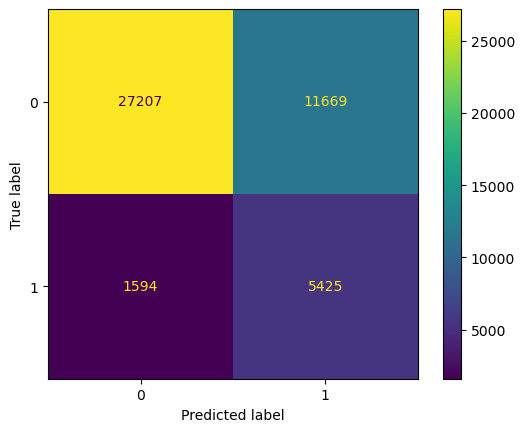

In [ ]:
# Evaluate best model

# Calculate the ratio of the number of negative class samples to positive class samples
balanced_weights = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Create an XGBoost model with scale_pos_weight
xgb = XGBClassifier(booster='gbtree', scale_pos_weight=balanced_weights, learning_rate=0.1, max_depth=5, subsample=0.7, random_state=88)

# Evaluate the model
evaluate_model(xgb, X_train, y_train, X_test, y_test)

## 7. Voting Classifier

So far, all the models that were tried appears to give similar results.

Another different model that will be tried will be the Voting Classifier, which combines conceptually different machine learning classifiers (Logistic Regression, SVM + RBF, Random Forest, XGBoost) and use a majority vote to predict the class labels. The intention of applying this is to combine the different strengths of different types of models as well as balance out their individual weakness, with the aim of reducing bias.

Hard voting will be applied. Soft voting cannot be used as the output of SVM+RBF is not the predicted probabilities. Based on the documentation on Scikit-learn, there does not appear to be any relevant hyperparameters to tune, therefore I will not apply GridSearchCV.

Overall, key classification results when applied to the test set:
- Balanced accuracy: 73.67%  (LR: 73.62%)
- AUC-ROC score: 0.7367  (LR: 0.7362)
- Recall for the minority class (1): 75%  (LR: 77%)
- Overall F1 score: 76.32%  (LR: 75.20%)

It appears that there is some improvement with the hard voting classifier in terms of balanced accuracy, AUC-ROC and F1 scores. However, the increase is only marginal (less than 1%). This suggests that there could be some 'performance ceiling' with classical ML models, which could stem from the nature of the data in the imbalanced dataset, making it hard for the applied algorithms to differentiate and correctly classify them.

                      Train      Test

balanced_accuracy  0.743436  0.736700

precision          0.850874  0.847545

recall             0.727175  0.727988

f1                 0.762933  0.763267

auc_roc            0.743436  0.736700 



Testing Set Classification Report:

               precision    recall  f1-score   support



           0       0.94      0.72      0.82     38876

           1       0.33      0.75      0.46      7019



    accuracy                           0.73     45895

   macro avg       0.64      0.74      0.64     45895

weighted avg       0.85      0.73      0.76     45895




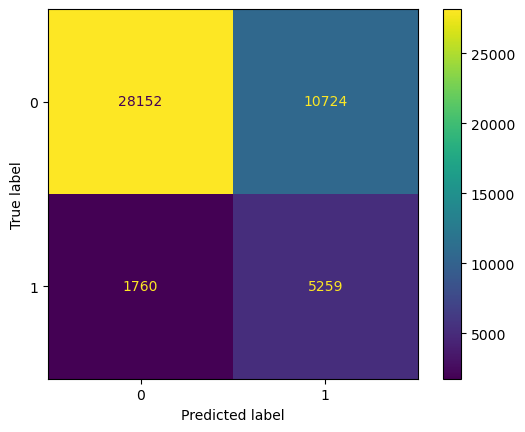

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.kernel_approximation import RBFSampler

### Define the base models
# Logistic Regression with Polynomial Features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, interaction_only=True)
logr = LogisticRegression(solver='lbfgs', class_weight = 'balanced')
logr_base = Pipeline([
   #(nickname, step)
    ('poly', poly),
    ('scaler', scaler),
    ('logr', logr)
])

# SVC with RBF Features
rbf = RBFSampler(gamma = 0.01)
svc = LinearSVC(class_weight='balanced', C=1, dual=True)
svm_rbf_base = Pipeline([
   #(nickname, step)
    ('rbf', rbf),  # degree selected by GridSearchCV
    ('scaler', scaler),
    ('svc', svc) # C selected by GridSearchCV
])

# Random Forest
rfc_base = RandomForestClassifier(
    n_estimators = 100,  # default
    max_features='sqrt',
    max_depth= 15,
    max_leaf_nodes = 150,
    min_samples_split = 200,
    class_weight='balanced', # ensure balanced weights to account for class imbalance (balanced, balanced_subsample - very similar results)
    random_state=88)

# XGBoost
balanced_weights = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb_base = XGBClassifier(booster='gbtree', scale_pos_weight=balanced_weights, learning_rate=0.1, max_depth=5, subsample=0.7, random_state=88)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[('logreg', logr_base), ('svm_rbf', svm_rbf_base), ('rfc', rfc_base) , ('xgb', xgb_base)], voting='hard')

# Evaluate the model
evaluate_model(voting_clf, X_train, y_train, X_test, y_test)

## 8. Feedforward Neural Network

As classical ML models does not appear to show much improvement, I will attempt to train a simple feedforward neural network for this purpose.

Neural networks are capable of learning complex, non-linear relationships in the data. This flexibility allows them to capture intricate patterns and dependencies present in imbalanced datasets, where the minority class may be characterized by subtle and non-linear features.

### 8.1 Setup & Hyperparameter Tuning

Use KerasTuner to find the best set of hyperparameters for the neural network.

https://keras.io/guides/keras_tuner/getting_started/


Hyperparameters & aspects of the neural network architecture to be assessed include:

*   Number of neurons to be used in the hidden layer (First layer: range of 16 to 64. Second layer: range of 16 to 64)
*   Whether to use one or two hidden layers
*   Activation function to use for each hidden layer (ReLU, Hyperbolic Tangent or Softplus)
*   Optimizer to use (RMSprop, Adam or Adamax)
*   Training batch size (32, 64 or 128)

The options above were derived based on initial trial runs of KerasTuner which provided a range of hyperparameters that tended to provide better performance.

Activation function for output layer & loss function will not be varied as this is dependent on the nature of the machine learning problem. As this is a binary classification problem,
* Activation function for Output layer: Sigmoid
* Loss function: Binary cross-entropy

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner

class MyHyperModel(keras_tuner.HyperModel):

# Tune the architecture of the neural network
    def build(self, hp):
        model = keras.Sequential()

        # Tune first hidden layer
        model.add(
            layers.Dense(
                # Tune number of neuron units
                units=hp.Int("units1", min_value=16, max_value=64, step=8),
                # Tune the activation function to use.
                activation=hp.Choice("activation1", ["relu", "tanh", "softplus"]),
                input_shape=(21,)
            )
        )

        # Decide whether to use 2nd hidden layer
        if hp.Boolean("hidden2"):
            model.add(
                layers.Dense(
                    # If 2nd hidden layer is used, tune number of units & activation function to use
                    units=hp.Int("units2", min_value=16, max_value=64, step=8),
                    activation=hp.Choice("activation2", ["relu", "tanh", "softplus"])
                    )
                )

        # Output layer
        model.add(
            layers.Dense(1, name="output",activation="sigmoid"))

        model.compile(
            optimizer=hp.Choice("optimizer", ["rmsprop","adam","adamax"]),
            loss="binary_crossentropy",
            metrics=["accuracy","AUC"]
        )
        return model

# Tune the training parameters of the neural network
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            # Tune batch size
            batch_size=hp.Choice("batch_size", [32, 64, 128]),
            **kwargs,
        )


KerasTuner will trial 15 different combinations of hyperparameters, and identify the best combination based on which gave the highest validation AUC.

In [ ]:
MyHyperModel(keras_tuner.HyperParameters())

tuner = keras_tuner.RandomSearch(
    MyHyperModel(),
    objective=keras_tuner.Objective("val_auc", direction="max"),
    max_trials=15,
    overwrite=True,
    directory="my_dir",
    project_name="DBA5106_Bonus2",
)

tuner.search_space_summary()

Search space summary

Default search space size: 4

units1 (Int)

{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 8, 'sampling': 'linear'}

activation1 (Choice)

{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'softplus'], 'ordered': False}

hidden2 (Boolean)

{'default': False, 'conditions': []}

optimizer (Choice)

{'default': 'rmsprop', 'conditions': [], 'values': ['rmsprop', 'adam', 'adamax'], 'ordered': False}


In [ ]:
# Search for the best combination of hyperparameters over 5 epochs
# Will stop training if the "val_loss" hasn't improved in 2 epochs.
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=2)])

Trial 15 Complete [00h 00m 39s]

val_auc: 0.8094097375869751



Best val_auc So Far: 0.8118436932563782

Total elapsed time: 00h 18m 28s


In [ ]:
# Display the best two combinations with the highest ROC-AUC score
tuner.results_summary(2)

Results summary

Results in my_dir/DBA5106_Bonus2

Showing 2 best trials

Objective(name="val_auc", direction="max")



Trial 09 summary

Hyperparameters:

units1: 56

activation1: softplus

hidden2: False

optimizer: adamax

batch_size: 32

units2: 16

activation2: softplus

Score: 0.8118436932563782



Trial 10 summary

Hyperparameters:

units1: 24

activation1: softplus

hidden2: True

optimizer: adamax

batch_size: 32

units2: 48

activation2: tanh

Score: 0.8114547729492188


### 8.2 Building the Best Neural Network Model obtained from Tuning

Based on KerasTuner, the set of model Hyperparameters that gave the best validation AUC score was identified.

```
# 1st hidden layer
units1: 56
activation1: softplus

# 2nd hidden layer
hidden2: False (ie. no 2nd hidden layer)

optimizer: adamax
batch_size: 32

ROC-AUC Score: 0.812
```

The neural network will now be built based on these combination of values, and subsequently trained on 10 epochs.


In [ ]:
from keras import metrics

# Model the NN architecture based on the results of the best combination from KerasTuner

# Define Sequential model
model = keras.models.Sequential()

# 1st hidden dense layer
model.add(keras.layers.Dense(56, name="hidden1", input_shape=(21,), activation="softplus"))

# # 2nd hidden dense layer
# model.add(keras.layers.Dense(48, name="hidden2", activation="tanh"))

# Define output dense layer (Binary classification)
model.add(keras.layers.Dense(1, name="output", activation="sigmoid"))

# print summary of model
model.summary()

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adamax", metrics=[metrics.AUC(curve="ROC", name="auc-roc"),
                                                                      metrics.TruePositives(name="TP"),    # True Positives
                                                                      metrics.TrueNegatives(name="TN"),    # True Negatives
                                                                      metrics.FalsePositives(name="FP"),   # False Positives
                                                                      metrics.FalseNegatives(name="FN")    # False Negatives
                                                                       ])

Model: "sequential_6"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 hidden1 (Dense)             (None, 56)                1232      

                                                                 

 output (Dense)              (None, 1)                 57        

                                                                 


Total params: 1289 (5.04 KB)

Trainable params: 1289 (5.04 KB)

Non-trainable params: 0 (0.00 Byte)

_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10

5737/5737 [==============================] - 30s 5ms/step - loss: 0.3775 - auc-roc: 0.7678 - TP: 3140.0000 - TN: 152075.0000 - FP: 3426.0000 - FN: 24938.0000 - val_loss: 0.3515 - val_auc-roc: 0.7995 - val_TP: 513.0000 - val_TN: 38555.0000 - val_FP: 321.0000 - val_FN: 6506.0000

Epoch 2/10

5737/5737 [==============================] - 29s 5ms/step - loss: 0.3476 - auc-roc: 0.8017 - TP: 4068.0000 - TN: 152278.0000 - FP: 3223.0000 - FN: 24010.0000 - val_loss: 0.3454 - val_auc-roc: 0.8064 - val_TP: 1087.0000 - val_TN: 38024.0000 - val_FP: 852.0000 - val_FN: 5932.0000

Epoch 3/10

5737/5737 [==============================] - 29s 5ms/step - loss: 0.3451 - auc-roc: 0.8060 - TP: 4394.0000 - TN: 152043.0000 - FP: 3458.0000 - FN: 23684.0000 - val_loss: 0.3501 - val_auc-roc: 0.8089 - val_TP: 313.0000 - val_TN: 38720.0000 - val_FP: 156.0000 - val_FN: 6706.0000

Epoch 4/10

5737/5737 [==============================] - 29s 5ms/step - loss: 0.3438 - auc-roc: 0.8082 - TP: 4413.0000 - TN: 1

Based on the results of the training above, it is observed that the validation AUC-ROC on the 10th epoch is 0.8119, which is higher than the results for all our classical ML models. <br>
However, it is also observed that the validation True Negative (TN) appears to be very high and True Positive (TP) is very low, this suggests that there is some sort of overfitting towards the majority class.

On closer observation, it may be because the model is classifying based on a set of balanced thresholds (eg. 0.5). Therefore, I will define a function below to evaluate the model on the test set separately, and adjusting the thresholds for prediction such that it will predict 0 if the threshold is <= 0.18.

In [ ]:
# Sigmoid activation function predicts a decimal value between 0 to 1
# Based on a threshold of 0.5, round off the prediction to the nearest value (class) of 0 or 1
def round_class_prediction(prediction):
  if prediction <= 0.18:
    return 0
  else:
    return 1


# Define function to evaluate Neural Network model & display confusion matrix
def evaluate_model_NN(model, X_test, y_test):

    # Evaluate the model - display validation loss, accuracy & AUC
    model.evaluate(X_test, y_test)

    # Predict the class labels, then round off to a value of 0 or 1
    Y_test_pred = model.predict(X_test, verbose=0)
    Y_test_pred_rounded = np.vectorize(round_class_prediction)(Y_test_pred)

    # Draw the Confusion matrix
    cm = confusion_matrix(y_test, Y_test_pred_rounded)
    disp = ConfusionMatrixDisplay(cm)

    print("\n")
    print(classification_report(y_test, Y_test_pred_rounded), "\n")

    return disp.plot()

Based on the results of the classification report and metrics,

- Balanced accuracy: 75%  (LR: 73.62%)
- Recall for the minority class (1): 69%  (LR: 77%)
- Overall weighted F1 score: 78%  (LR: 75.20%)

Therefore, the single-layer feedforward neural network was able to provide some additional improvement to the model, performing better in terms of balanced accuracy and F1 scores. However, this was likely contributed by the higher precision and recall scores of the majority class, and the recall for our class of interest (1, minority) was lower at 69%.

1435/1435 [==============================] - 6s 4ms/step - loss: 0.3416 - auc-roc: 0.8119 - TP: 632.0000 - TN: 38470.0000 - FP: 406.0000 - FN: 6387.0000





              precision    recall  f1-score   support



           0       0.93      0.76      0.84     38876

           1       0.35      0.69      0.46      7019



    accuracy                           0.75     45895

   macro avg       0.64      0.73      0.65     45895

weighted avg       0.84      0.75      0.78     45895

 




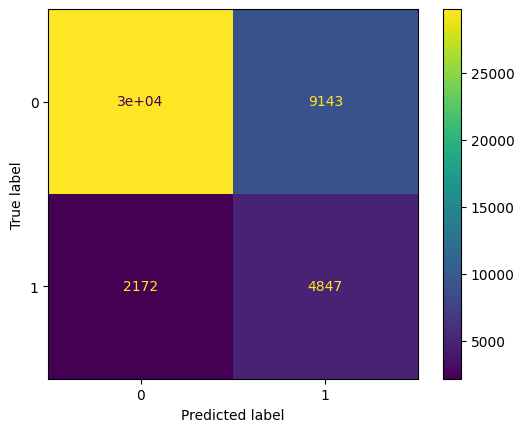

In [ ]:
# Evaluate the model & plot the confusion matrix
evaluate_model_NN(model, X_test, y_test)

## 9. Conclusion & Future Work

Comparing the performance between classic ML algorithms and neural network, their performances were generally similar but the neural network faired marginally better with higher balanced accuracy and overall F1, but did not do as well in terms of predicting of diabetic patients.

While neural networks delivered better prediction results, it did not perform as well in terms of computational performance. Neural networks are more computationally complex and expensive, which therefore took a much longer time to tune and train compared to most classic machine learning algorithms like logistic regression. Neural networks may also be prone to overfitting especially in smaller datasets, however this was avoided as the dataset utilised in this project is fairly large.

It appears that there is a performance ceiling at around 73-75% balanced accuracy. This suggests that more data on the minority class is likely required in order to better differentiate between the two classes.


*Future Work*

Other techniques that I wanted to try but did not have the time include upsampling, downsampling or hybrid methods (imbalanced learn package).

In addition, this project mostly focused on improving balanced accuracy, AUC-ROC or F1 score as a whole. But considering that diabetics are our primary class of interest, more work can be done to tune the parameters (eg. thresholds) such that the Recall for the minority class is increased.

Apart from that more sophisticated machine learning methods for outlier detection may be explored in the future, such as use of clustering techniques or different types of neural networks such as AutoEncoder.


## Appendix

### Appendix A. Stacking Classifier

Results were some what similar to the Hard Voting Classifier.

                      Train      Test

balanced_accuracy  0.743083  0.736021

precision          0.850705  0.847233

recall             0.727120  0.727726

f1                 0.762875  0.763031

auc_roc            0.743083  0.736021 



Testing Set Classification Report:

               precision    recall  f1-score   support



           0       0.94      0.72      0.82     38876

           1       0.33      0.75      0.46      7019



    accuracy                           0.73     45895

   macro avg       0.63      0.74      0.64     45895

weighted avg       0.85      0.73      0.76     45895




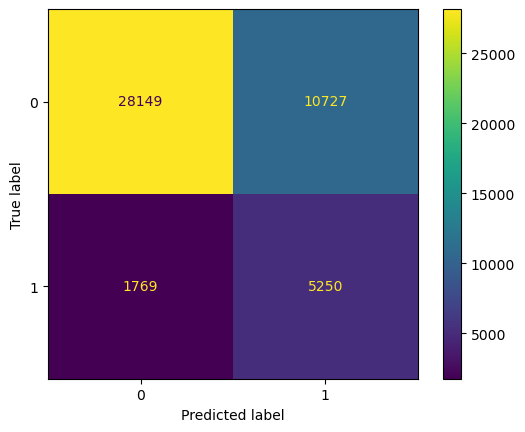

In [ ]:
from sklearn.ensemble import StackingClassifier

# base classifier
base_models = [('logreg', logr_base), ('svm_rbf', svm_rbf_base), ('rfc', rfc_base)]

# final meta-classifier, using XGBoost as the final estimator
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=xgb_base)

# Evaluate the model
evaluate_model(voting_clf, X_train, y_train, X_test, y_test)